# ATTX Metax use case 

This is an complementary documentation to the ATTX project's METAX use case. The purpose of this document is to demonstrate in a actionable manner, the results of different kinds of mapping appoarches. 

## Data sources

Tables and figures are based on data retrieved from SPARQL endpoint, which holds the following datasets:

* ATT model's SHACL representations - [download](https://iow.csc.fi/api/rest/exportModel?graph=http%3A%2F%2Fiow.csc.fi%2Fns%2Fatt&content-type=text%2Fturtle&lang=fi&raw=true)
 * SHACL version produced by IOW is out-dated, so we have made the following two changes to the original data in order to make the SHACL validator work: 
  * sh:predicate property is replaced with sh:path
  * sh:scopeClass property is replaced with sh:targetClass
* RML mappings that translate from JSON returned by the Etsin REST API to RDF 
* Results of JSON to RDF mapping of Etsin data
 * Following preprosessing operations have been executed before transformation to the JSON retrieved from REST API:
      * Unescpae localized fields
       * title: "{"eng": "..."}"
       * notes
      * Transform comma-separated lists into arrays
       * discipline
       * mimetype
       * geographic_coverage
       * language
       * fundingid
* Results of SHACL validation of RDF version of Etsin data

These data is unfortunately not part of this notebook, but must be loaded to an external RDF database and exposed through an SPARQL interface. All datasets are stored in their own name graphs.


### Setting up Virtuoso

Install Docker

Start Virtuoso container

```
docker run --name my-virtuoso -p 8890:8890 -p 1111:1111 -e SPARQL_UPDATE=true -e DEFAULT_GRAPH=http://www.example.com/my-graph -v /path/to/data -d tenforce/virtuoso
```

Adding data:
* login: dba/dba
* Linked Data -> Quad Store Upload


In [1]:
%endpoint http://localhost:8890/sparql

Endpoint set to: http://localhost:8890/sparql

### Graph statistics

In [8]:
%format json
%display table 

SELECT ?g (count(*) as ?count)
WHERE {
    graph ?g {
        ?s ?p ?o   
    }
    filter(strStarts(str(?g), "http://attx"))
} group by ?g order by ?count

Return format: JSON
Display: table

g,count
http://attx/metax/sample/1,61
http://attx/metax/mapping,282
http://attx/metax/model,2285
http://attx/metax/validation,191054
http://attx/metax/data,254236


* model = SHACL description of ATT model 
* mapping = RML mapping
* data = Result of JSON to RDF transformation based on mapping
* validation = Result of data validation based on model

## Mapping

Mapping is implemented using RML mapping descriptions.

### List of RML Logical sources

In [9]:
%format json
%display table 
prefix rml: <http://semweb.mmlab.be/ns/rml#>

SELECT distinct ?mapping
FROM <http://attx/metax/mapping>
WHERE {
    ?mapping rml:logicalSource ?sources
} limit 100

Return format: JSON
Display: table

mapping
etsin:DataSetIdentifiersExternal
etsin:Locations
etsin:Periods
etsin:Orgs
etsin:Funders
etsin:Distributors
etsin:Owners
etsin:Persons
etsin:Authors
etsin:Contributors


### Example: Locations

Return format: N3
Display: svg
Show literals: on

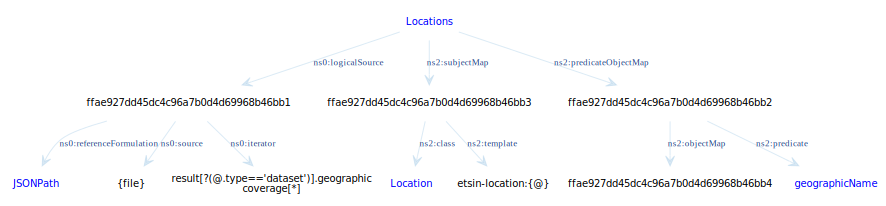

In [10]:
%format n3
%display diagram svg withliterals

PREFIX dct: <http://purl.org/dc/terms/> 
PREFIX dcat: <http://www.w3.org/ns/dcat#> 
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX att: <http://iow.csc.fi/ns/att#>
PREFIX etsin: <http://etsin.avointiede.fi/>

CONSTRUCT {
    ?s ?p ?o .
    ?o ?p2 ?o2 
}
FROM <http://attx/metax/mapping>
WHERE {
    BIND(<etsin:Locations> as ?s) . 
    ?s ?p ?o .
    ?o ?p2 ?o2
    
} 

### Example: Authors

Return format: N3
Display: svg
Show literals: on

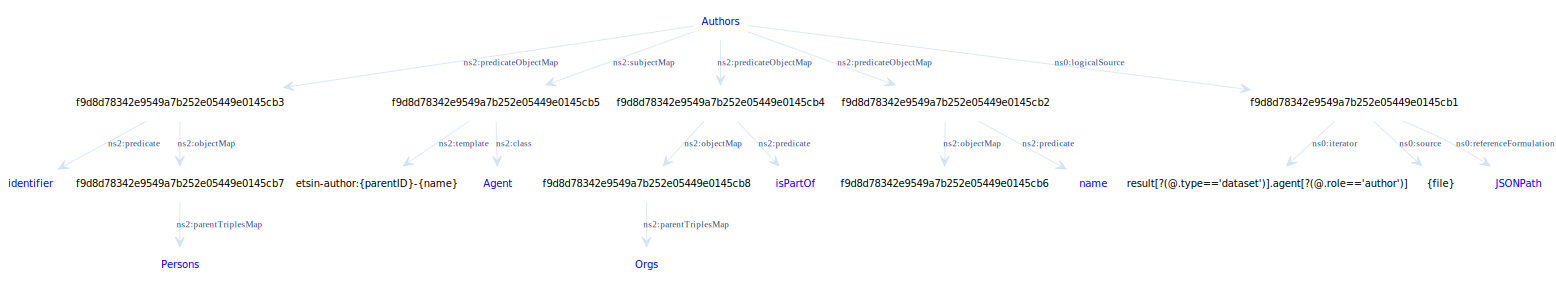

In [11]:
%format n3
%display diagram svg withliterals

PREFIX dct: <http://purl.org/dc/terms/> 
PREFIX dcat: <http://www.w3.org/ns/dcat#> 
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX att: <http://iow.csc.fi/ns/att#>
PREFIX rr: <http://www.w3.org/ns/r2rml#>

CONSTRUCT {
    ?s ?p ?o .
    ?o ?p2 ?o2 .
    ?o2 rr:parentTriplesMap ?tripleMap
        
}
FROM <http://attx/metax/mapping>
WHERE {
    BIND(<etsin:Authors> as ?s) . 
    ?s ?p ?o .
    ?o ?p2 ?o2 . 

    OPTIONAL {
        ?o2 rr:parentTriplesMap ?tripleMap
    }
    
} 

### Example: Contact point

Return format: N3
Display: svg
Show literals: on

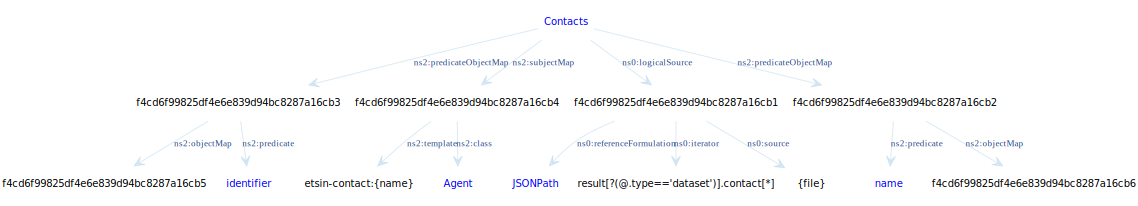

In [12]:
%format n3
%display diagram svg withliterals

PREFIX dct: <http://purl.org/dc/terms/> 
PREFIX dcat: <http://www.w3.org/ns/dcat#> 
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX att: <http://iow.csc.fi/ns/att#>
PREFIX rr: <http://www.w3.org/ns/r2rml#>

CONSTRUCT {
    ?s ?p ?o .
    ?o ?p2 ?o2 .
    ?o2 rr:parentTriplesMap ?tripleMap
        
}
FROM <http://attx/metax/mapping>
WHERE {
    BIND(<etsin:Contacts> as ?s) . 
    ?s ?p ?o .
    ?o ?p2 ?o2 . 

    OPTIONAL {
        ?o2 rr:parentTriplesMap ?tripleMap
    }
    
} 

## Sample visualization

Visualization of dataset urn:nbn:fi:csc-kata20170829161649626151.

Return format: N3
Display: svg
Show literals: on

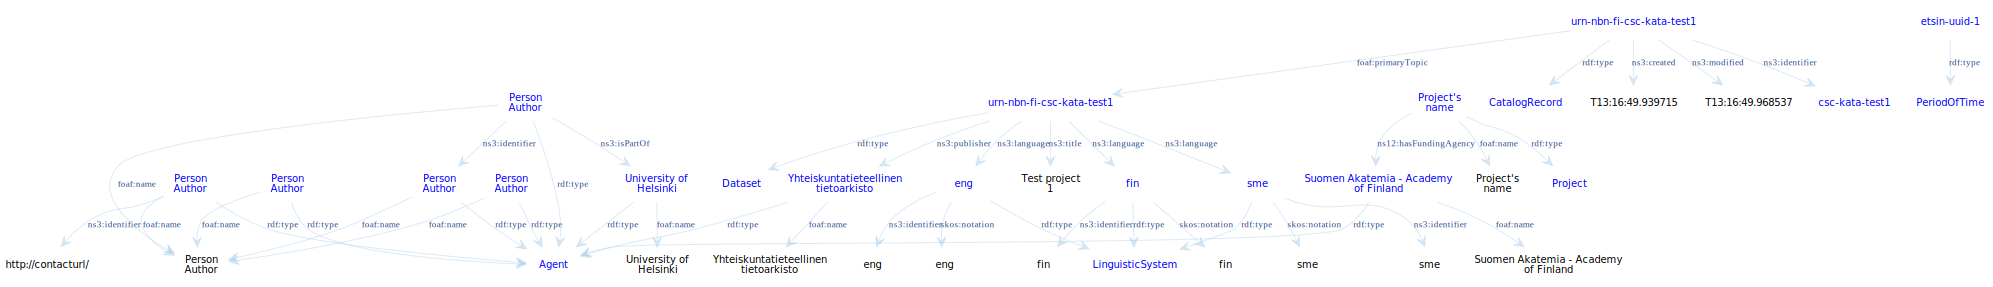

In [2]:
%format n3
%display diagram svg withliterals

PREFIX dct: <http://purl.org/dc/terms/> 
PREFIX dcat: <http://www.w3.org/ns/dcat#> 
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX att: <http://iow.csc.fi/ns/att#>

CONSTRUCT {
    ?s ?p ?o
}
FROM <http://attx/metax/sample/1>
WHERE {    
    ?s ?p ?o
    # Filtering out fields with long strings
    MINUS {
        ?s dct:description ?o .           
    }
    MINUS {
        ?s dct:bibliographicCitation ?o .           
    }
} 

## Validation 

Validation was run using [TopBraiD SHACL implementation](https://github.com/TopQuadrant/shacl) against the current IOW version of the ATT metadata model. Input data consists of approximately 9500 dataset descriptions transformer using the mapping described above. 


In [14]:
%format json
%display table 
PREFIX sh: <http://www.w3.org/ns/shacl#> 

ASK {
    GRAPH  <http://attx/metax/mapping> {
        ?r a sh:ValidationReport .
        ?r sh:conforms ?conforms        
    }
}

Return format: JSON
Display: table

Result: False

In [18]:
%format json
%display table 
PREFIX sh: <http://www.w3.org/ns/shacl#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?shapeLabel ?sh ?message ?path  (count(*) as ?occurences) 
FROM <http://attx/metax/validation>
FROM <http://attx/metax/model>
WHERE {
    ?report a sh:ValidationReport .
    ?report sh:result ?r .
    ?r sh:resultPath ?path .
    ?r sh:resultMessage ?message .
    ?r sh:sourceShape ?prop .
    ?sh sh:property ?prop .
    ?sh rdfs:label ?shapeLabel
        
    FILTER (lang(?shapeLabel) = 'fi')
} order by ?shapeLabel ?message limit 100

Return format: JSON
Display: table

shapeLabel,sh,message,path,occurences
Ajanjakso,http://iow.csc.fi/ns/att#PeriodOfTime,Value does not have datatype xsd:dateTime,http://schema.org/startDate,363
Ajanjakso,http://iow.csc.fi/ns/att#PeriodOfTime,Value does not have datatype xsd:dateTime,http://schema.org/endDate,344
Projekti,http://iow.csc.fi/ns/att#Project,Less than 1 values,http://schema.org/sourceOrganization,30
Projekti,http://iow.csc.fi/ns/att#Project,Less than 1 values,http://purl.org/dc/terms/identifier,30
Projekti,http://iow.csc.fi/ns/att#Project,Value does not have datatype rdf:langString,http://xmlns.com/foaf/0.1/name,30
Toimija,http://iow.csc.fi/ns/att#ResearchAgent,Value does not have datatype xsd:anyURI,http://purl.org/dc/terms/identifier,10323
Tutkimuksen tietoaineisto,http://iow.csc.fi/ns/att#ResearchDataset,Less than 1 values,http://www.w3.org/ns/dcat#contactPoint,252
Tutkimuksen tietoaineisto,http://iow.csc.fi/ns/att#ResearchDataset,Less than 1 values,http://purl.org/dc/terms/description,38
Tutkimuksen tietoaineisto,http://iow.csc.fi/ns/att#ResearchDataset,Less than 1 values,http://purl.org/dc/terms/title,36
Tutkimuksen tietoaineisto,http://iow.csc.fi/ns/att#ResearchDataset,Less than 1 values,http://purl.org/dc/terms/creator,406


Let's take a closer look at the ResearchDatasets that are missing a title.


In [16]:
%format json
%display table 
PREFIX sh: <http://www.w3.org/ns/shacl#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dct: <http://purl.org/dc/terms/> 

SELECT 
    URI(concat('https://etsin.avointiede.fi/dataset/', SUBSTR(STR(?focusNode), 9)) as ?etsinLink)
    URI((concat('https://etsin.avointiede.fi/api/3/action/package_show?id=', SUBSTR(STR(?focusNode), 9)) as ?etsinAPILink))
FROM <http://attx/metax/validation>
FROM <http://attx/metax/model>
FROM <http://attx/metax/data>
WHERE {
    BIND(<http://purl.org/dc/terms/title> as ?prop) .
    BIND(<http://iow.csc.fi/ns/att#ResearchDataset> as ?sh) .    
    ?r sh:sourceConstraintComponent sh:MinCountConstraintComponent .
    ?r sh:focusNode ?focusNode .
    ?r sh:resultPath ?prop .
    ?r sh:sourceShape ?source .
    ?sh sh:property ?source .
    
   

} limit 10 offset 0

Return format: JSON
Display: table

callret-0,callret-1
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613101055906377,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613101055906377
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170221141820999404,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170221141820999404
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613101152484229,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613101152484229
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613101126428345,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613101126428345
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613100751862041,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613100751862041
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613100912348455,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613100912348455
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613100849446164,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613100849446164
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613101018589707,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613101018589707
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613101042333354,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613101042333354
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613100927596979,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613100927596979


It turns out that our mapping is a bit off when it comes to handling title data

Current mapping: 
```
  rr:predicateObjectMap [
      rr:predicate dct:title;
      rr:objectMap [
        rml:reference "title.eng" ;
        rr:language "eng"
      ]
    ];
  rr:predicateObjectMap [
      rr:predicate dct:title;
      rr:objectMap [
        rml:reference "title.fin" ;
        rr:language "fin"
      ]
    ];

```

Dataset [urn-nbn-fi-csc-kata20170221141820999404](https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170221141820999404) for example has title in Italian and that is not processed by the current mapping.

New, little better, title mapping:

```
  rr:predicateObjectMap [
      rr:predicate dct:title;
      rr:objectMap [
        rml:reference "title.ita" ;
        rr:language "ita"
      ]
    ];


```

This should of course extended to support all the languages available from Etsin. 

What about missing contacts?

In [17]:
%format json
%display table 
PREFIX sh: <http://www.w3.org/ns/shacl#> 
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX dct: <http://purl.org/dc/terms/> 

SELECT 
    URI(concat('https://etsin.avointiede.fi/dataset/', SUBSTR(STR(?focusNode), 9)) as ?etsinLink)
    URI((concat('https://etsin.avointiede.fi/api/3/action/package_show?id=', SUBSTR(STR(?focusNode), 9)) as ?etsinAPILink))
FROM <http://attx/metax/validation>
FROM <http://attx/metax/model>
FROM <http://attx/metax/data>
WHERE {
    BIND(<http://www.w3.org/ns/dcat#contactPoint> as ?prop) .
    BIND(<http://iow.csc.fi/ns/att#ResearchDataset> as ?sh) .    
    ?r sh:sourceConstraintComponent sh:MinCountConstraintComponent .
    ?r sh:focusNode ?focusNode .
    ?r sh:resultPath ?prop .
    ?r sh:sourceShape ?source .
    ?sh sh:property ?source .
    
   

} limit 400 offset 0

Return format: JSON
Display: table

callret-0,callret-1
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613100859536771,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613100859536771
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613100838488699,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613100838488699
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613100803289414,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613100803289414
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613101143539886,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613101143539886
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613100919297711,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613100919297711
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613101059751476,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613101059751476
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613100850445913,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613100850445913
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613100937757973,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613100937757973
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613101013662576,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613101013662576
https://etsin.avointiede.fi/dataset/urn-nbn-fi-csc-kata20170613100958852425,https://etsin.avointiede.fi/api/3/action/package_show?id=urn-nbn-fi-csc-kata20170613100958852425
